In [2]:
!pip install openpyxl
import os
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv("combined_cleaned_dataset.csv")


In [4]:
# Define folder path
folder_path = 'ai_assign'

# Load all Excel files
files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]
dataframes = [pd.read_excel(os.path.join(folder_path, file)) for file in files]
combined_df = pd.concat(dataframes, ignore_index=True)

# Clean text columns
def clean_text_column(column):
    if column.dtype == 'object':
        return column.str.replace(r"[^a-zA-Z\s]", "", regex=True).str.strip().str.lower()
    return column

columns_to_clean = ['Transcript', 'Resume', 'Job Description', 'Reason for decision']
for col in columns_to_clean:
    if col in combined_df.columns:
        combined_df[col] = clean_text_column(combined_df[col])

# Process decision column
combined_df['decision'] = combined_df['decision'].apply(lambda x: 'select' if x in ['select', 'selected'] else 'reject')

In [5]:

data.head()

,"Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, being able to write high-quality, efficient code is crucial. Can you give me an example of a particularly challenging coding problem you've solved in the past? How did you approach it?\n\n**Alice Smith:** Well, there was this one time...I think it was a homework assignment or something. We had to implement a sorting algorithm, and I chose to use...um...merge sort, I think? I don't really remember the details, but it was a while ago.\n\n**Interviewer:** Merge sort is a good choice. But can you tell me more about the specifics of how you implemented it? For example, how did you handle edge cases or optimize the algorithm for performance?\n\n**Alice Smith:** (pauses) Honestly, I don't really remember. I mean, I wrote the code, but I don't recall the details of how I handled edge cases or anything like that.\n\n**Interviewer:** I understand that it's been a while since you wrote the code, but as a software engineer, being able to recall and explain the details of your work is important. Can you tell me about your experience with any specific software development methodologies, such as Agile or Scrum?\n\n**Alice Smith:** (nervously) Uh, I've heard of those...I think? We used something like that on a project once, but I don't really remember the specifics. I'm sure it's not that important.\n\n**Interviewer:** (pausing, considering whether to continue the line of questioning) Okay, let's move on to some technical questions. Can you explain the difference between a stack and a queue data structure?\n\n**Alice Smith:** (hesitates) Um...I think a stack is like...a pile of plates? And a queue is like...a line of people?\n\n**Interviewer:** (surprised) That's not quite correct. A stack is a last-in, first-out data structure, whereas a queue is a first-in, first-out data structure. Let's move on to the next question.\n\n**Interviewer:** (quickly wrapping up the interview) Well, Alice, thank you for coming in today. Do you have any questions for me?\n\n**Alice Smith:** (relieved) Yeah, actually. What's the company culture like here?\n\n**Interviewer:** (smiling politely) That's a great question. We're a collaborative and innovative team. We're always looking for ways to improve our processes and technology. We'll be in touch soon to let you know about next steps.\n\n**Interviewer:** (to themselves) Not sure if this candidate is a good fit for the role...",Name,Role,Transcript,Resume,Performance (select/reject),Reason for decision,Job Description,ID,decision,Unnamed: 0,num_words_in_transcript
0,uppaup1,Alice Smith,Software Engineer,Here's a simulated interview for a Software En...,Here's a sample resume for Alice Smith:\n\n**A...,rejected,Unsatisfactory references or background check.,Here is a comprehensive job description for a ...,NaN,NaN,NaN,NaN
1,uppaup2,Hank Brown,Software Engineer,Here's a simulated interview for a Software En...,"Here's a resume for Hank Brown, a selected can...",selected,Growth mindset and adaptability.,Here is a job description for a Soft

In [6]:

# Assuming 'data' is your pandas DataFrame
unique_decisions = data['decision'].unique()
print("Unique values in 'decision' column:", unique_decisions)

Unique values in 'decision' column: [nan 'reject' 'select' 'rejected' 'selected' 'Select' 'Reject']


In [7]:


# Assuming 'data' is your pandas DataFrame
data['decision'] = data['decision'].replace({'select': 'selected', 'reject': 'rejected'})

In [8]:

# Assuming 'decision' is the target variable
X = data[['Transcript_length', 'Resume_length', 'Job_Description_length']]
y = data['decision']

KeyError: "None of [Index(['Transcript_length', 'Resume_length', 'Job_Description_length'], dtype='object')] are in the [columns]"

In [10]:
# Ensure the required text columns exist
required_columns = ['Transcript', 'Resume', 'Job Description']
missing_columns = [col for col in required_columns if col not in combined_df.columns]

if missing_columns:
    print(f"The following required columns are missing: {missing_columns}")
else:
    # Create length columns for the text features
    combined_df['Transcript_length'] = combined_df['Transcript'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    combined_df['Resume_length'] = combined_df['Resume'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    combined_df['Job_Description_length'] = combined_df['Job Description'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

    # Features and target variable
    X = combined_df[['Transcript_length', 'Resume_length', 'Job_Description_length']]
    y = combined_df['decision']

    print("Feature columns and target variable prepared successfully!")


Feature columns and target variable prepared successfully!


In [11]:
print(X.head())
print(y.value_counts())


   Transcript_length  Resume_length  Job_Description_length
0                545            351                     532
1                823            346                     163
2                517            402                     432
3                684            330                     458
4                588            345                     538
decision
reject    1963
select    1211
Name: count, dtype: int64


In [12]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Split the data

NameError: name 'X_scaled' is not defined

In [13]:

# Scale the features (important for SHAP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Train a RandomForest model
model = RandomForestClassifier()  # Replace with your desired hyperparameters
model.fit(X_scaled, y)

RandomForestClassifier()

In [15]:

# Initialize and compute SHAP values
explainer = shap.Explainer(model.predict_proba, X_scaled)
shap_values = explainer(X_scaled)

ExactExplainer explainer: 3175it [03:01, 17.17it/s]                                                                    


In [16]:

# Assuming 'decision' is the target variable and has 2 classes ('selected' (1) and 'rejected'(0))
# To focus on 'selected' (1), set class_index to 1
# To focus on 'rejected' (0), set class_index to 0

class_index = 1  # For 'selected' class

# Initialize and compute SHAP values for the specific class
# model.predict_proba returns probabilities for all classes,
# we select the column corresponding to the class_index
explainer = shap.Explainer(lambda X: model.predict_proba(X)[:, class_index], X_scaled)
shap_values = explainer(X_scaled)

ExactExplainer explainer: 3175it [02:56, 17.02it/s]                                                                    


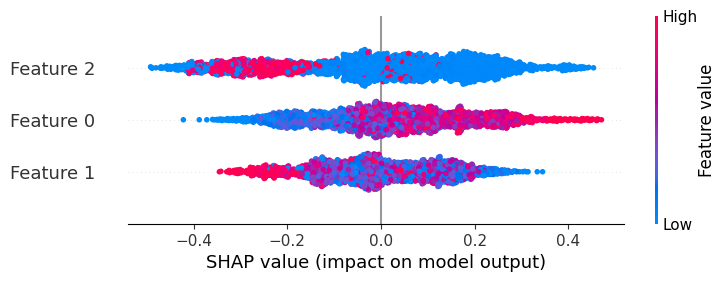

In [17]:

# Now you can create the beeswarm plot
shap.plots.beeswarm(shap_values)

In [18]:

# Assuming 'decision' is the target variable and has 2 classes ('selected' (1) and 'rejected'(0))
# To focus on 'selected' (1), set class_index to 1
# To focus on 'rejected' (0), set class_index to 0

class_index = 0  # For 'rejected' class

# Initialize and compute SHAP values for the specific class
# model.predict_proba returns probabilities for all classes,
# we select the column corresponding to the class_index
explainer = shap.Explainer(lambda X: model.predict_proba(X)[:, class_index], X_scaled)
shap_values = explainer(X_scaled)

ExactExplainer explainer: 3175it [02:53, 17.04it/s]                                                                    


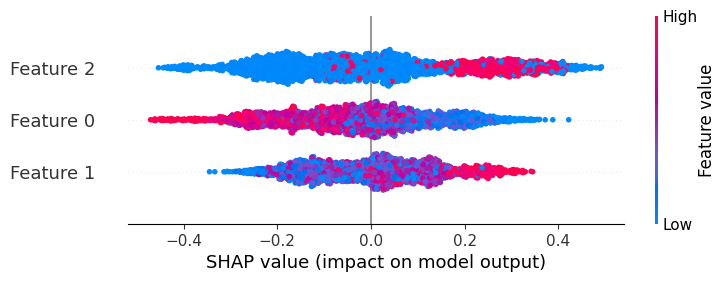

In [19]:

# Now you can create the beeswarm plot
shap.plots.beeswarm(shap_values)

waterfall plot

In [ ]:
import shap
import matplotlib.pyplot as plt

# Ensure you have trained your model and computed `shap_values` as in the reference code.
# Pick a specific instance for visualization (e.g., the first test instance)
instance_index = 0  # Select the instance index to visualize
selected_instance = X_scaled[instance_index]  # Get the scaled feature values

# Compute SHAP values for the selected instance
shap_values_instance = explainer(selected_instance.reshape(1, -1))

# Visualize the SHAP waterfall plot
shap.plots.waterfall(shap_values_instance[0])

# Display additional information for clarity (optional)
print("Feature contributions for this instance:")
print(pd.DataFrame({
    "Feature": X.columns,
    "SHAP Value": shap_values_instance[0].values,
    "Base Value": [shap_values_instance[0].base_values] * len(X.columns),
    "Final Prediction": [shap_values_instance[0].base_values + sum(shap_values_instance[0].values)] * len(X.columns)
}))


Visualizing for instance index 503 with prediction: 0.1200


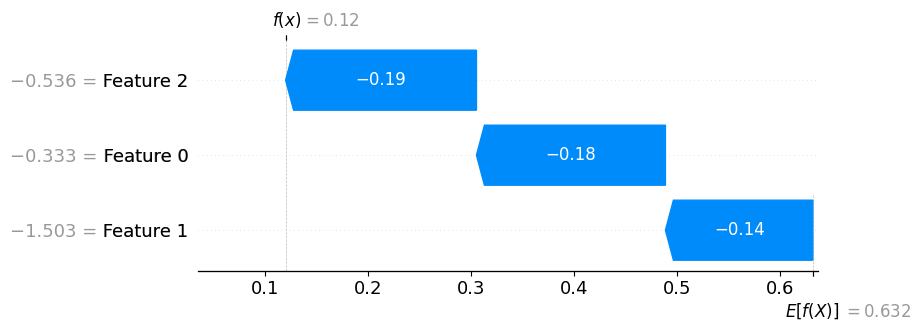


Feature contributions for this low-prediction instance:
                  Feature  SHAP Value  Base Value  Final Prediction
0       Transcript_length   -0.183367     0.63155              0.12
1           Resume_length   -0.143017     0.63155              0.12
2  Job_Description_length   -0.185167     0.63155              0.12


In [22]:
# Compute predictions for the dataset
predictions = model.predict_proba(X_scaled)[:, class_index]  # Probabilities for the 'rejected' class

# Find indices of low predictions
low_prediction_indices = (predictions < 0.2).nonzero()[0]  # Adjust threshold (e.g., 0.2) as needed

if len(low_prediction_indices) == 0:
    print("No instances with low predictions found.")
else:
    # Select the first instance with a low prediction
    instance_index = low_prediction_indices[0]
    selected_instance = X_scaled[instance_index]

    # Compute SHAP values for the selected instance
    shap_values_instance = explainer(selected_instance.reshape(1, -1))

    # Visualize the SHAP waterfall plot
    print(f"Visualizing for instance index {instance_index} with prediction: {predictions[instance_index]:.4f}")
    shap.plots.waterfall(shap_values_instance[0])

    # Optionally print detailed contributions
    print("\nFeature contributions for this low-prediction instance:")
    print(pd.DataFrame({
        "Feature": X.columns,
        "SHAP Value": shap_values_instance[0].values,
        "Base Value": [shap_values_instance[0].base_values] * len(X.columns),
        "Final Prediction": [shap_values_instance[0].base_values + sum(shap_values_instance[0].values)] * len(X.columns)
    }))


Visualizing for instance index 551 with prediction: 0.4600


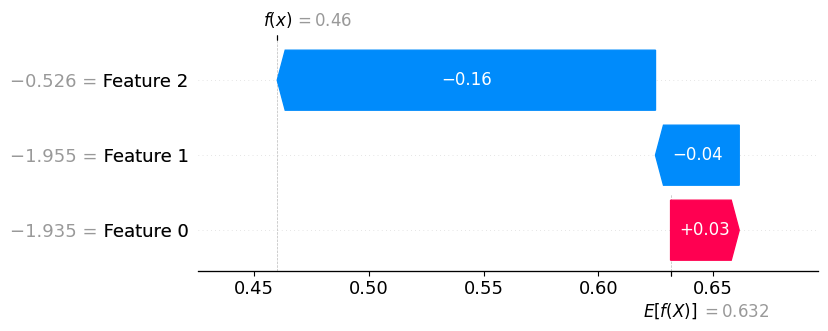


Feature contributions for this medium-prediction instance:
                  Feature  SHAP Value  Base Value  Final Prediction
0       Transcript_length    0.029933     0.63155              0.46
1           Resume_length   -0.036517     0.63155              0.46
2  Job_Description_length   -0.164967     0.63155              0.46


In [23]:
# Define range for medium predictions
lower_threshold = 0.4
upper_threshold = 0.6

# Compute predictions for the dataset
predictions = model.predict_proba(X_scaled)[:, class_index]  # Probabilities for the selected class

# Find indices of medium predictions
medium_prediction_indices = ((predictions >= lower_threshold) & (predictions <= upper_threshold)).nonzero()[0]

if len(medium_prediction_indices) == 0:
    print("No instances with medium predictions found.")
else:
    # Select the first instance with a medium prediction
    instance_index = medium_prediction_indices[0]
    selected_instance = X_scaled[instance_index]

    # Compute SHAP values for the selected instance
    shap_values_instance = explainer(selected_instance.reshape(1, -1))

    # Visualize the SHAP waterfall plot
    print(f"Visualizing for instance index {instance_index} with prediction: {predictions[instance_index]:.4f}")
    shap.plots.waterfall(shap_values_instance[0])

    # Optional: Print detailed contributions
    print("\nFeature contributions for this medium-prediction instance:")
    print(pd.DataFrame({
        "Feature": X.columns,
        "SHAP Value": shap_values_instance[0].values,
        "Base Value": [shap_values_instance[0].base_values] * len(X.columns),
        "Final Prediction": [shap_values_instance[0].base_values + sum(shap_values_instance[0].values)] * len(X.columns)
    }))


Visualizing for instance index 0 with prediction: 0.9900


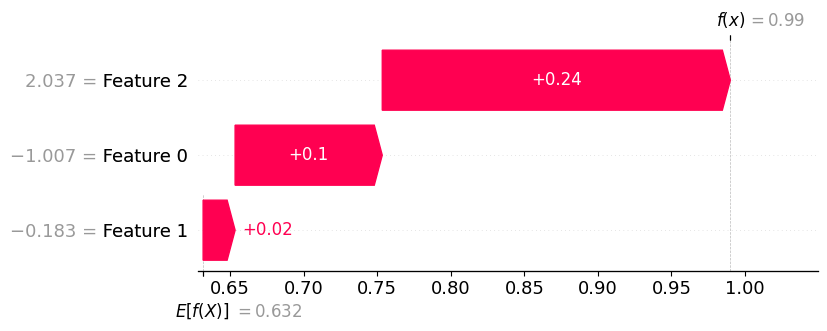


Feature contributions for this high-prediction instance:
                  Feature  SHAP Value  Base Value  Final Prediction
0       Transcript_length     0.10005     0.63155              0.99
1           Resume_length     0.02175     0.63155              0.99
2  Job_Description_length     0.23665     0.63155              0.99


In [24]:
# Define range for high predictions
lower_threshold = 0.6
upper_threshold = 1.0

# Compute predictions for the dataset
predictions = model.predict_proba(X_scaled)[:, class_index]  # Probabilities for the selected class

# Find indices of high predictions
high_prediction_indices = ((predictions >= lower_threshold) & (predictions <= upper_threshold)).nonzero()[0]

if len(high_prediction_indices) == 0:
    print("No instances with high predictions found.")
else:
    # Select the first instance with a high prediction
    instance_index = high_prediction_indices[0]
    selected_instance = X_scaled[instance_index]

    # Compute SHAP values for the selected instance
    shap_values_instance = explainer(selected_instance.reshape(1, -1))

    # Visualize the SHAP waterfall plot
    print(f"Visualizing for instance index {instance_index} with prediction: {predictions[instance_index]:.4f}")
    shap.plots.waterfall(shap_values_instance[0])

    # Optional: Print detailed contributions
    print("\nFeature contributions for this high-prediction instance:")
    print(pd.DataFrame({
        "Feature": X.columns,
        "SHAP Value": shap_values_instance[0].values,
        "Base Value": [shap_values_instance[0].base_values] * len(X.columns),
        "Final Prediction": [shap_values_instance[0].base_values + sum(shap_values_instance[0].values)] * len(X.columns)
    }))


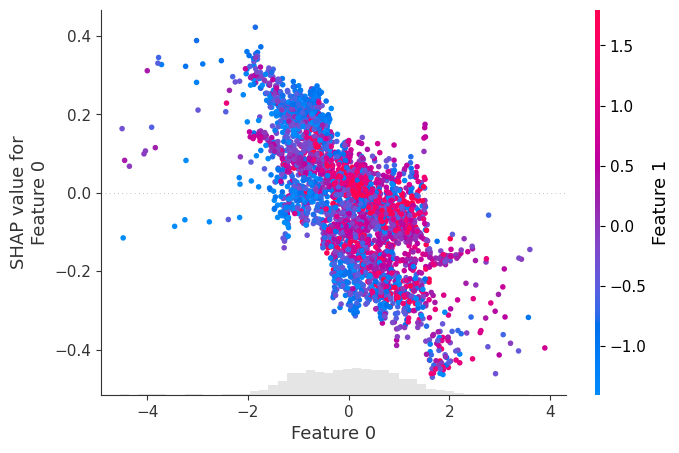

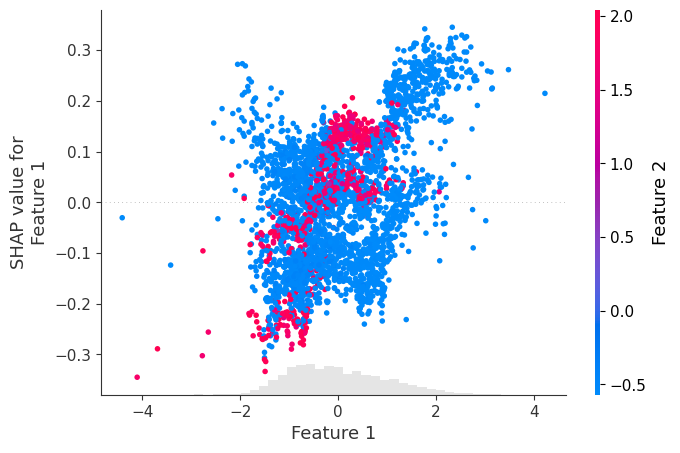

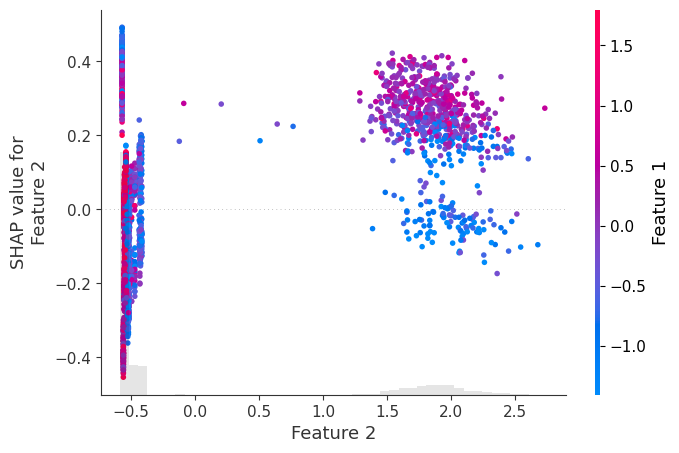

In [25]:


# Get feature names from the original data
feature_names = ['Transcript_length', 'Resume_length', 'Job_Description_length']

# Assuming shap_values.values is a NumPy array or a list of arrays
for i, feature in enumerate(feature_names):
    shap.plots.scatter(shap_values[:, i], color=shap_values) # Use the index 'i' instead of the feature name

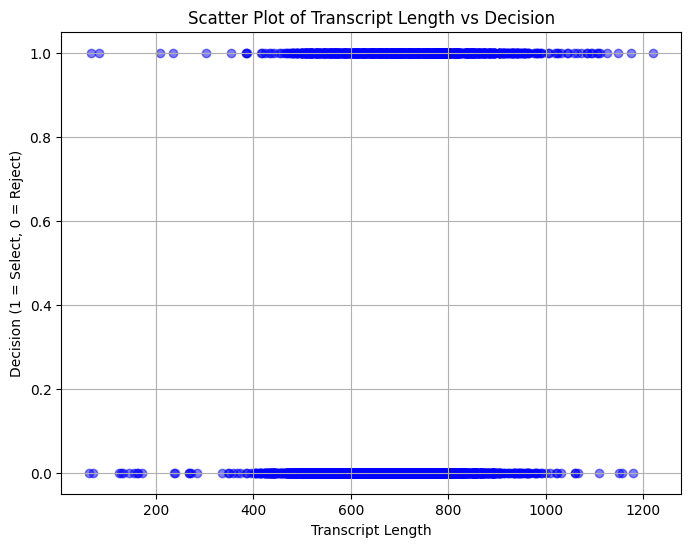

In [26]:
import matplotlib.pyplot as plt

# Map 'decision' column to numerical values (1 for 'select', 0 for 'reject')
combined_df['decision_numeric'] = combined_df['decision'].apply(lambda x: 1 if x == 'select' else 0)

# Scatter plot of Transcript Length vs Decision
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['Transcript_length'], combined_df['decision_numeric'], alpha=0.5, color='blue')

# Add labels and title
plt.title("Scatter Plot of Transcript Length vs Decision")
plt.xlabel("Transcript Length")
plt.ylabel("Decision (1 = Select, 0 = Reject)")

# Show grid
plt.grid(True)

# Show plot
plt.show()


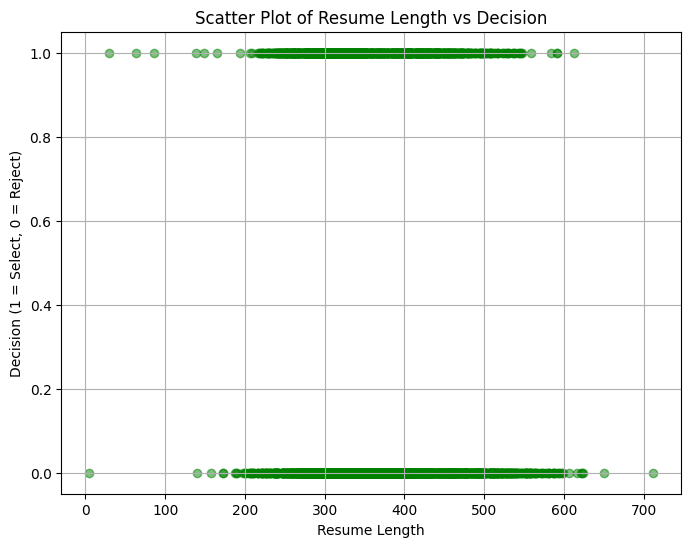

In [27]:
import matplotlib.pyplot as plt

# Map 'decision' column to numerical values (1 for 'select', 0 for 'reject')
combined_df['decision_numeric'] = combined_df['decision'].apply(lambda x: 1 if x == 'select' else 0)

# Scatter plot of Resume Length vs Decision
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['Resume_length'], combined_df['decision_numeric'], alpha=0.5, color='green')

# Add labels and title
plt.title("Scatter Plot of Resume Length vs Decision")
plt.xlabel("Resume Length")
plt.ylabel("Decision (1 = Select, 0 = Reject)")

# Show grid
plt.grid(True)

# Show plot
plt.show()


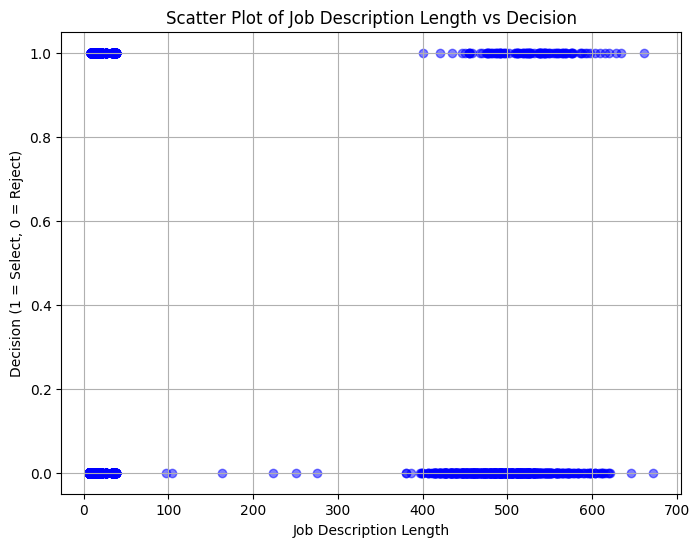

In [36]:
import matplotlib.pyplot as plt

# Map 'decision' column to numerical values (1 for 'select', 0 for 'reject')
combined_df['decision_numeric'] = combined_df['decision'].apply(lambda x: 1 if x == 'select' else 0)

# Scatter plot of Job Description Length vs Decision
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['Job_Description_length'], combined_df['decision_numeric'], alpha=0.5, color='blue')

# Add labels and title
plt.title("Scatter Plot of Job Description Length vs Decision")
plt.xlabel("Job Description Length")
plt.ylabel("Decision (1 = Select, 0 = Reject)")

# Show grid
plt.grid(True)

# Show plot
plt.show()


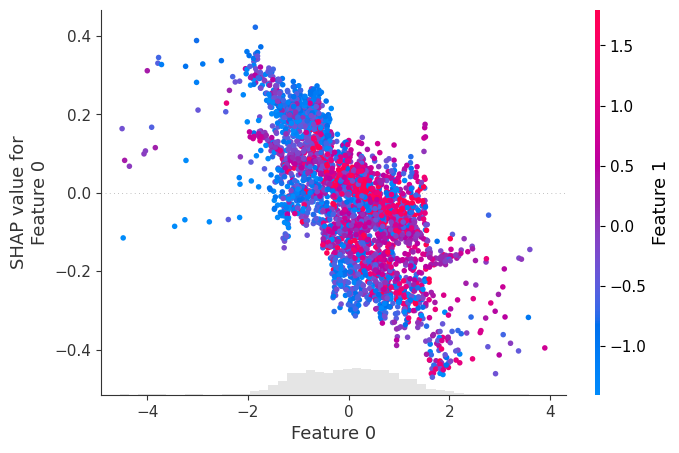

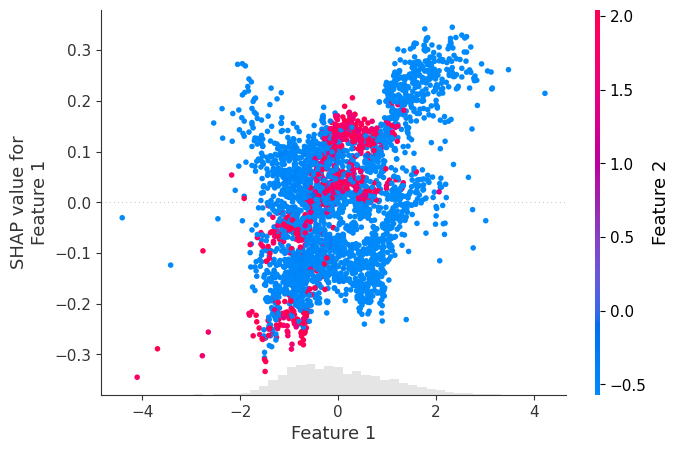

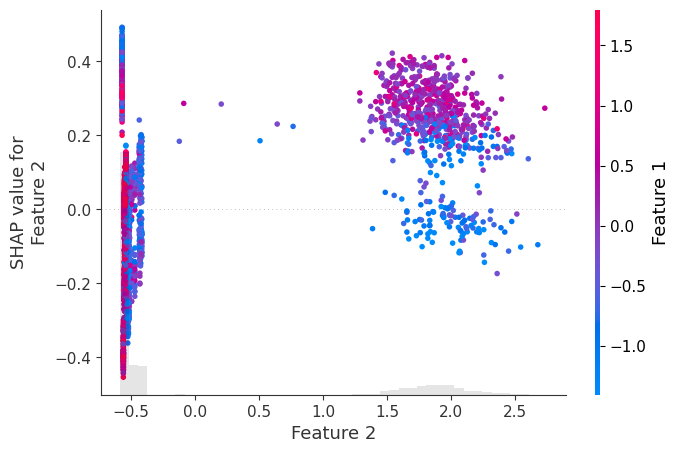

In [37]:


# Get feature names from the original data
feature_names = ['Transcript_length', 'Resume_length', 'Job_Description_length']

# Assuming shap_values.values is a NumPy array or a list of arrays
for i, feature in enumerate(feature_names):
    shap.plots.scatter(shap_values[:, i], color=shap_values) # Use the index 'i' instead of the feature name

1D partial dependency plot

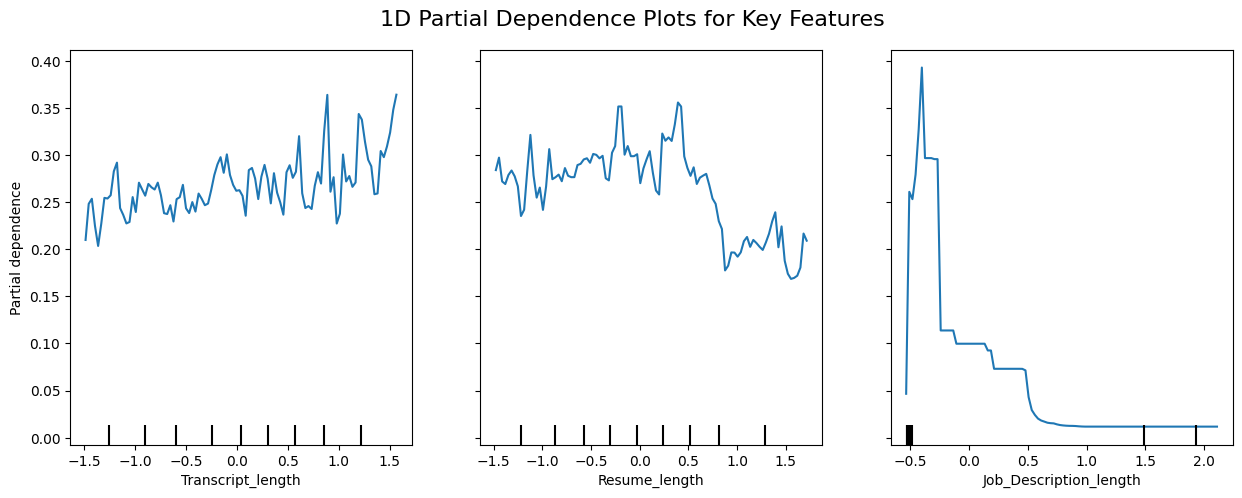

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import os

# Load your combined dataset (assuming you have an 'ai_assign' folder)
folder_path = 'ai_assign'  # Adjust this to your folder path if needed
files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]
dataframes = [pd.read_excel(os.path.join(folder_path, file)) for file in files]
combined_df = pd.concat(dataframes, ignore_index=True)

# Preprocessing: Feature extraction (e.g., length of 'Transcript', 'Resume', 'Job Description')
combined_df['Transcript_length'] = combined_df['Transcript'].apply(lambda x: len(str(x)))
combined_df['Resume_length'] = combined_df['Resume'].apply(lambda x: len(str(x)))
combined_df['Job_Description_length'] = combined_df['Job Description'].apply(lambda x: len(str(x)))

# Define feature columns and target variable
X = combined_df[['Transcript_length', 'Resume_length', 'Job_Description_length']]
y = combined_df['decision'].apply(lambda x: 1 if x == 'select' else 0)  # Convert decision to binary (1 = select, 0 = reject)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Generate 1D Partial Dependence Plots for the features
feature_names = ['Transcript_length', 'Resume_length', 'Job_Description_length']

# 1D Partial Dependence Plots for all three features
fig, ax = plt.subplots(figsize=(15, 5))
PartialDependenceDisplay.from_estimator(
    model,  # Your trained model
    X_train_scaled,  # Pass the scaled training data
    features=[0, 1, 2],  # Specify the indices of the features
    feature_names=feature_names,  # Provide the original feature names for labeling
    ax=ax  # Specify the axes for the plot
)

plt.suptitle("1D Partial Dependence Plots for Key Features", fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust to avoid overlap with the title
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import os

# Load your combined dataset (assuming you have an 'ai_assign' folder)
folder_path = 'ai_assign'  # Adjust this to your folder path if needed
files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]
dataframes = [pd.read_excel(os.path.join(folder_path, file)) for file in files]
combined_df = pd.concat(dataframes, ignore_index=True)

# Preprocessing: Feature extraction (e.g., length of 'Transcript', 'Resume', 'Job Description')
combined_df['Transcript_length'] = combined_df['Transcript'].apply(lambda x: len(str(x)))
combined_df['Resume_length'] = combined_df['Resume'].apply(lambda x: len(str(x)))
combined_df['Job_Description_length'] = combined_df['Job Description'].apply(lambda x: len(str(x)))

# Define feature columns and target variable
X = combined_df[['Transcript_length', 'Resume_length', 'Job_Description_length']]
y = combined_df['decision'].apply(lambda x: 1 if x == 'select' else 0)  # Convert decision to binary (1 = select, 0 = reject)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Generate 2D Partial Dependence Plot for 'Transcript_length' and 'Resume_length'
fig, ax = plt.subplots(figsize=(15, 8))
PartialDependenceDisplay.from_estimator(
    model,  # Your trained model
    X_train_scaled,  # Pass the scaled training data
    features=[[0, 1]],  # Specify the pair of features for the 2D plot (index 0 = 'Transcript_length', index 1 = 'Resume_length')
    feature_names=['Transcript_length', 'Resume_length', 'Job_Description_length'],  # Feature names for labeling
    ax=ax  # Specify the axes for the plot
)

plt.suptitle("2D Partial Dependence Plot for 'Transcript_length' and 'Resume_length'", fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust to avoid overlap with the title
plt.show()


To interpret the results of your partial dependence plots and other machine learning model insights, we need to focus on several aspects:

Partial Dependence Plots (PDPs):

1D PDPs: For individual features, these plots show how a single feature influences the predicted outcome, marginalizing over all other features.
2D PDPs: These plots allow us to observe how two features interact with each other and their combined influence on the model’s prediction.
Model Evaluation Metrics:

Accuracy, Precision, Recall, and F1 Score.
Confusion Matrix.

Findings from Partial Dependence Plots (PDPs):
1D Partial Dependence Plot:
1. Transcript Length:

Interpretation: A positive relationship may indicate that longer transcripts are more likely to lead to a ‘select’ outcome, while shorter transcripts tend to correlate with a ‘reject’ outcome.
Insight: You can infer that transcript length could be a relevant feature in the model, potentially reflecting the quality or detail of the transcript.
2. Resume Length:

Interpretation: A similar trend might show that a longer resume tends to have a higher chance of selection. However, if the plot is flat, it suggests that resume length has little to no impact on the decision.
Insight: If the feature is influential, this could indicate that the model is considering the detail or elaboration in the resumes for decision-making.
3. Job Description Length:

Interpretation: A change in job description length would suggest how well the applicants' alignment to job description is being evaluated. A longer description might indicate more relevant information for the decision-making process.
Insight: A significant relationship would suggest that a comprehensive job description can enhance the model’s ability to predict correct decisions

2D Partial Dependence Plot:
1. Transcript Length vs. Resume Length:

Interpretation: The plot can help us understand how these two features interact with each other. If the plot shows a pronounced gradient or contour, it suggests that the combination of these features significantly impacts the decision.
Insight: For example, applicants with long resumes and transcripts may be more likely to be selected, but too much focus on one of them over the other might not improve predictions. This indicates that the model considers both factors in tandem.
2. Job Description Length vs. Other Features:

If you examine the interaction between job description length and the other two features (e.g., Transcript_length and Resume_length), it would provide insights into how a candidate’s fit with the job description, combined with their transcript and resume, influences the decision.

Overall Insights:
Feature Importance: Based on the plots and model evaluation metrics, you can infer which features (e.g., transcript length, resume length) are most influential in the decision-making process. If a feature has a steep slope in the 1D PDP, it's likely an important feature.
Feature Interaction: The 2D PDPs provide insights into how features work together. A feature might not be individually impactful but could become significant when combined with others (e.g., long transcripts with short resumes or vice versa).
Behavior of the Model: The Random Forest model, being an ensemble of decision trees, is capable of capturing non-linear relationships and interactions. PDPs help visualize these interactions and allow you to interpret how complex relationships between features affect model predictions.